                                                                Project "AI Method For Business"

For the course 'AI Method for Business' the students of the master Digital Driven Business have developed different machine learning tools to answer the following research question: 

                                Which movies should a cinema screen to maximize ticket sales in the future? 
In order to answer this research, four subquestions were created. The sub-questions are: 

1. What features need further research in order to understand their effect on worldwide box office?
2. Which features are the most important determinants of customer clusters?
3. Which model is the most most accurate in determining the worldwide Box office sales?
4. To what extent can the Supervised model(s) predict Worldwide box office of a movie based solely on qualitative properties of the movie?


The students who participated in this study are: 

* Ward Bleeker          500805826
* Victor Varga          500913660
* Guido Huiskens        500685026
* Melanie Matt          500737939


## I. Import all libraries 

According to Medium (2022), the EDA (Exploratory of Data Analysis) is an essential step. It allows researchers to understand the data and clean it, so it is ready for analysis.

In [1098]:
# Import libraries for data manipulation. Adjusted from Dauhmik (n.d.). 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
from scipy.stats import chi2_contingency
from statsmodels.stats.outliers_influence import variance_inflation_factor
from numpy.random import randn
import scipy.stats as stats

# Import libraries for data visualization. Adjusted from Medium (2022) 
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

# Import libaries for modelling KNN. Adjusted from Pinosio (2022) 
from sklearn import datasets
from typing import List

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" # The term 'all' is used to make jupyter print all outputs and not only the last one. 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score


#Kmeans library  
import random
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
#!pip install yellowbrick 
from yellowbrick.cluster import KElbowVisualizer  # pip install yellowbrick for the Elbow method


### II. EDA: Import Excel file and clean dataset - Victor, Ward, Guido & Melanie

In [1099]:
# Import Excel file Metaclean and show the beginning of the dataset.
# Read Excel file Sales show the beginning of the dataset.
df_metaclean = pd.read_csv("C:/Users/melan/Documents/Python Scripts/AI method course/metaClean43Brightspace4.csv", encoding='ISO-8859-1', delimiter=';')
df_sales = pd.read_csv("C:/Users/melan/Documents/Python Scripts/AI method course/sales4.csv", encoding='ISO-8859-1', delimiter=';')

In [1100]:
# Merge sales data set with metaclean
df_masterfile = df_metaclean.merge(df_sales,
                            on="title",
                            how='left')

df_masterfile['ï»¿url'] = df_masterfile['ï»¿url'].astype('str')
df_masterfile.drop_duplicates(subset=['ï»¿url'],inplace=True,keep='last')
df_masterfile


,ï»¿url,title,studio,rating,runtime_x,cast,director,genre_x,summary,awards,...,worldwide_box_office,production_budget,Unnamed: 8,opening_weekend,theatre_count,avg run per theatre,runtime_y,keywords,creative_type,url
0,https://www.metacritic.com/movie/!women-art-re...,!Women Art Revolution,Hotwire Productions,| Not Rated,83.0,NaN,Lynn Hershman-Leeson,Documentary,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.metacritic.com/movie/10-cloverfiel...,10 Cloverfield Lane,Paramount Pictures,| PG-13,104.0,"John Gallagher Jr.,John Goodman,Mary Elizabeth...",Dan Trachtenberg,"Action,Sci-Fi,Drama,Mystery,Thriller,Horror","Waking up from a car accident, a young woman (...","#18MostDiscussedMovieof2016 , #1MostSharedMovi...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://www.metacritic.com/movie/10-items-or-less,10 Items or Less,Click Star,| R,82.0,"Jonah Hill,Morgan Freeman,Paz Vega",Brad Silberling,"Drama,Comedy,Romance",While researching a role as a supermarket mana...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://www.metacritic.com/movie/100-bloody-acres,100 Bloody Acres,Music Box Films,| Not Rated,91.0,NaN,Cameron Cairnes,"Horror,Comedy",Reg and Lindsay run an organic fertilizer busi...,NaN,...,NaN,NaN,NaN,3419.0,13.0,"1,5",91.0,Accidental Death,Contemporary Fiction,https://www.the-numbers.com/movie/100-Bloody-A...
4,https://www.metacritic.com/movie/100-streets,100 Streets,Samuel Goldwyn Films,NaN,93.0,NaN,Jim O'Hanlon,Drama,NaN,NaN,...,3.070000e+02,NaN,NaN,NaN,NaN,NaN,93.0,Ensemble,Contemporary Fiction,https://www.the-numbers.com/movie/100-Streets-...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11989,https://www.metacritic.com/movie/zoolander-2,Zoolander 2,Paramount Pictures,| PG-13,102.0,"Ben Stiller,Kristen Wiig,Owen Wilson,PenÃÂ©lo...",Ben Stiller,Comedy,Derek (Ben Stiller) and Hansel (Owen Wilson) a...,"#87MostDiscussedMovieof2016 , #80MostSharedMov...",...,5.534869e+07,50000000.0,NaN,13841146.0,3394.0,"2,8",102.0,Directing Yourself,Contemporary Fiction,https://www.the-numbers.com/movie/Zoolander-2-...
11991,https://www.metacritic.com/movie/zoom,Zoom,Columbia Pictures,| PG,83.0,"Chevy Chase,Courteney Cox,Tim Allen",Peter Hewitt,"Action,Adventure,Sci-Fi,Family",A former superhero (Allen) is called back into...,NaN,...,1.250619e+07,35000000.0,NaN,4510408.0,2501.0,"2,6",NaN,Independent/Other Comics,Super Hero,https://www.the-numbers.com/movie/Zoom-(2006)
11993,https://www.metacritic.com/movie/zoom-2016,Zoom,Screen Media Films,| Not Rated,96.0,NaN,Pedro Morelli,"Drama,Comedy,Animation",A multi-dimensional interface between a comic ...,NaN,...,1.250619e+07,35000000.0,NaN,4510408.0,2501.0,"2,6",NaN,Independent/Other Comics,Super Hero,https://www.the-numbers.com/movie/Zoom-(2006)
11994,https://www.metacritic.com/movie/zootopia,Zootopia,Walt Disney Studios Motion Pictures,| PG,108.0,NaN,Byron Howard,"Action,Adventure,Comedy,Crime,Animation,Family",NaN,"#80BestMovieof2016 , #11MostDiscussedMovieof20...",...,1.004630e+09,150000000.0,NaN,75063401.0,3827.0,"9,8",108.0,Beat Cops,Kids Fiction,https://www.the-numbers.com/movie/Zootopia-(2016)


In [1101]:
# Rename columns for clarification 
df_masterfile.rename(columns = {'ï»¿url':'URL', 'ï»¿year':'Year'}, inplace = True)
df_masterfile.head()

,URL,title,studio,rating,runtime_x,cast,director,genre_x,summary,awards,...,worldwide_box_office,production_budget,Unnamed: 8,opening_weekend,theatre_count,avg run per theatre,runtime_y,keywords,creative_type,url
0,https://www.metacritic.com/movie/!women-art-re...,!Women Art Revolution,Hotwire Productions,| Not Rated,83.0,NaN,Lynn Hershman-Leeson,Documentary,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.metacritic.com/movie/10-cloverfiel...,10 Cloverfield Lane,Paramount Pictures,| PG-13,104.0,"John Gallagher Jr.,John Goodman,Mary Elizabeth...",Dan Trachtenberg,"Action,Sci-Fi,Drama,Mystery,Thriller,Horror","Waking up from a car accident, a young woman (...","#18MostDiscussedMovieof2016 , #1MostSharedMovi...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://www.metacritic.com/movie/10-items-or-less,10 Items or Less,Click Star,| R,82.0,"Jonah Hill,Morgan Freeman,Paz Vega",Brad Silberling,"Drama,Comedy,Romance",While researching a role as a supermarket mana...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://www.metacritic.com/movie/100-bloody-acres,100 Bloody Acres,Music Box Films,| Not Rated,91.0,NaN,Cameron Cairnes,"Horror,Comedy",Reg and Lindsay run an organic fertilizer busi...,NaN,...,NaN,NaN,NaN,3419.0,13.0,"1,5",91.0,Accidental Death,Contemporary Fiction,https://www.the-numbers.com/movie/100-Bloody-A...
4,https://www.metacritic.com/movie/100-streets,100 Streets,Samuel Goldwyn Films,NaN,93.0,NaN,Jim O'Hanlon,Drama,NaN,NaN,...,307.0,NaN,NaN,NaN,NaN,NaN,93.0,Ensemble,Contemporary Fiction,https://www.the-numbers.com/movie/100-Streets-...


In [1102]:
# Drop columns that are not necessary 
df_masterfile.drop(columns=['summary', 'director','cast', 'url', 'Unnamed: 8', 'URL', 'title', 'keywords', 'creative_type','domestic_box_office', 'international_box_office'], inplace=True)
# Check if the above mentioned columns are removed from the dataset. 
df_masterfile

,studio,rating,runtime_x,genre_x,awards,metascore,userscore,RelDate,Year,release_date,genre_y,worldwide_box_office,production_budget,opening_weekend,theatre_count,avg run per theatre,runtime_y
0,Hotwire Productions,| Not Rated,83.0,Documentary,NaN,70,NaN,1-6-2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Paramount Pictures,| PG-13,104.0,"Action,Sci-Fi,Drama,Mystery,Thriller,Horror","#18MostDiscussedMovieof2016 , #1MostSharedMovi...",76,"7,7",11-3-2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Click Star,| R,82.0,"Drama,Comedy,Romance",NaN,54,"5,8",1-12-2006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Music Box Films,| Not Rated,91.0,"Horror,Comedy",NaN,63,"7,5",28-6-2013,2013.0,June 28th,Black Comedy,NaN,NaN,3419.0,13.0,"1,5",91.0
4,Samuel Goldwyn Films,NaN,93.0,Drama,NaN,44,"6,1",13-1-2017,2016.0,January 13th,Drama,3.070000e+02,NaN,NaN,NaN,NaN,93.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11989,Paramount Pictures,| PG-13,102.0,Comedy,"#87MostDiscussedMovieof2016 , #80MostSharedMov...",34,"4,1",12-2-2016,2016.0,February 12th,Comedy,5.534869e+07,50000000.0,13841146.0,3394.0,"2,8",102.0
11991,Columbia Pictures,| PG,83.0,"Action,Adventure,Sci-Fi,Family",NaN,26,"4,4",11-8-2006,2006.0,August 11th,Adventure,1.250619e+07,35000000.0,4510408.0,2501.0,"2,6",NaN
11993,Screen Media Films,| Not Rated,96.0,"Drama,Comedy,Animation",NaN,55,"5,7",2-9-2016,2006.0,August 11th,Adventure,1.250619e+07,35000000.0,4510408.0,2501.0,"2,6",NaN
11994,Walt Disney Studios Motion Pictures,| PG,108.0,"Action,Adventure,Comedy,Crime,Animation,Family","#80BestMovieof2016 , #11MostDiscussedMovieof20...",78,"8,6",4-3-2016,2016.0,March 4th,Adventure,1.004630e+09,150000000.0,75063401.0,3827.0,"9,8",108.0


Below is a brief explanation of why it was chosen to remove specific columns within the dataset.
 
- Summary: no text reconstruction will be used within the research. 
- Title, URL & url: these columns were used to filter the dataset and served as a unique identifier for the merge function. These columns are now dropped because they are irrelevant to further functions used within the study.  
- Unnamed 8: is an empty column and therefore of no added value for this study
- keywords: the same reason applies here as the reason used for the summary column. 
- Creative types: within this research, the focus is on genres. The creative type column is a broader genre aspect so this column will be dropped. 
- International and domestic box office: these columns are removed because the focus is on the box office with the most datasets, which is the worldwide box office.
 

### EDA: Basic plots

<AxesSubplot:>

Text(0.5, 0, 'Genre')

Text(0, 0.5, 'Counts')

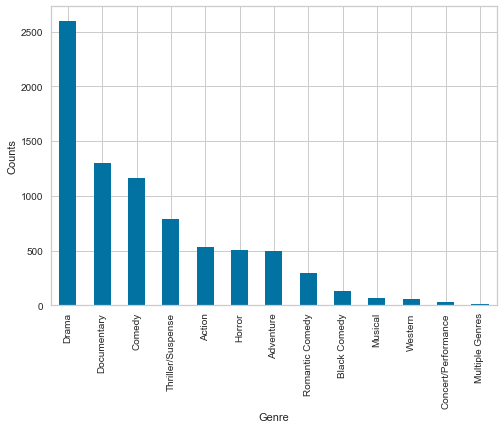

In [1103]:
# Show total count per genre. Code adjusted from Medium (2022)
df_masterfile.genre_y.value_counts().plot(kind="bar")
#plt.figure(figsize=(12,8))
plt.xlabel('Genre')
plt.ylabel('Counts')
plt.show()

### Corelation

In [1104]:
# Show corelation of the dataset
corelation= df_masterfile.corr()
print(corelation)

                      runtime_x  metascore      Year  worldwide_box_office  \
runtime_x              1.000000   0.129547  0.013623              0.252402   
metascore              0.129547   1.000000  0.137536              0.033497   
Year                   0.013623   0.137536  1.000000             -0.042992   
worldwide_box_office   0.252402   0.033497 -0.042992              1.000000   
production_budget      0.376838   0.011760  0.110825              0.746557   
opening_weekend        0.273982  -0.043605  0.040763              0.903846   
theatre_count          0.216210  -0.301351  0.028732              0.569368   
runtime_y              0.926454   0.117034 -0.034096              0.261547   

                      production_budget  opening_weekend  theatre_count  \
runtime_x                      0.376838         0.273982       0.216210   
metascore                      0.011760        -0.043605      -0.301351   
Year                           0.110825         0.040763       0.028732 

<AxesSubplot:>

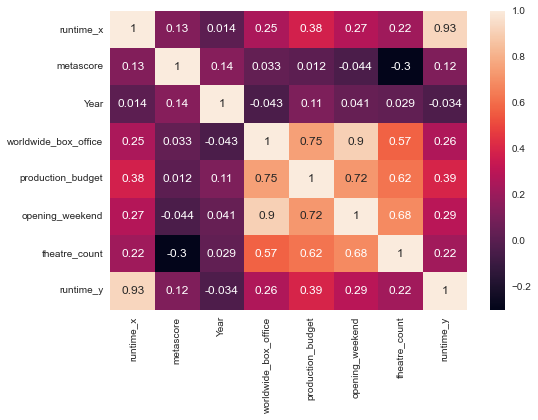

In [1105]:
# Show corelation by using the heatmap function
#plt.figure(figsize=(16,16))
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns,annot=True)

plt.show()

The heatmap above presents the following information; 

negative correlation between the columns:
- worldwide box office and year, 

a strong correlation between 
- worldwide box office and opening weekend;
- worldwide box office and production budget

 a correlation between
- worldwide box office and theatre count. 

and a weak corelation between
- worldwide box office and runtime


In [1106]:
# missing values overview per feature. Adjusted from DataSciencePartners (2022).
for column in df_masterfile.columns:
    aantal_missing = np.sum(df_masterfile[column].isnull())
    print('{} - {}'.format(column, aantal_missing))

studio - 350
rating - 1067
runtime_x - 255
genre_x - 20
awards - 6976
metascore - 0
userscore - 2105
RelDate - 0
Year - 3007
release_date - 3007
genre_y - 3379
worldwide_box_office - 5990
production_budget - 7892
opening_weekend - 4747
theatre_count - 4729
avg run per theatre - 4733
runtime_y - 4672


In [1107]:
# Drop columns that are not correlated with worldwide box office or miss too many values. 
df_masterfile.drop(columns=['production_budget', 'awards','runtime_y', 'avg run per theatre', 'release_date'], inplace=True)
# Check if the above mentioned columns are removed from the dataset. 
# df_masterfile

### Why dropping the columns?

- production budget: Despite the fact that this column has a high correlation with the worldwide box office, we choose to drop the column.  The reason therefore is that this column lacks too much data, making it not useful for predictions. 
- runtime_y: looking at the heatmap, there is a weak to almost no correlation between worldwide box office and runtime. As a result, this column is also removed from the dataset
- Avg run per theater: This feature is less critical for feature engineering because it speaks for itself. The more often the film is played in theatres, the more sales it will have. 
- Release date: by merging the two datasets, we got two columns for release date. We drop this column because we are working on the column that has the most data points. 
- Awards: Within this research the focus is on features that can be influenced with the production of the movie. 

In [1108]:
# Show only columns that includes data for worldwide box office 
df_cleaned =df_masterfile[df_masterfile['worldwide_box_office'].notna()]
df_cleaned.head()

,studio,rating,runtime_x,genre_x,metascore,userscore,RelDate,Year,genre_y,worldwide_box_office,opening_weekend,theatre_count
4,Samuel Goldwyn Films,NaN,93.0,Drama,44,"6,1",13-1-2017,2016.0,Drama,307.0,NaN,NaN
8,Kino Lorber,| Not Rated,93.0,Drama,65,NaN,8-5-2015,2015.0,Drama,47019.0,NaN,NaN
11,THINKFilm,| R,107.0,"Drama,Mystery,Thriller,Crime",36,"6,7",18-8-2006,2006.0,Drama,143782.0,20774.0,6.0
15,Sony Pictures Classics,| PG-13,159.0,"Drama,Thriller,Crime,War",72,"7,4",4-3-2009,2009.0,Thriller/Suspense,4581361.0,12042.0,5.0
18,Sony Pictures Classics,| PG-13,118.0,"History,Sport",44,"6,6",11-6-2021,2021.0,Drama,3712409.0,251569.0,132.0


In [1109]:
# Change datatype worldwide box office into integer. 
df_cleaned["worldwide_box_office"] = df_cleaned["worldwide_box_office"].astype("float")
df_cleaned["worldwide_box_office"] = df_cleaned["worldwide_box_office"].astype("int")

In [1110]:
df_cleaned.describe

<bound method NDFrame.describe of                                     studio       rating  runtime_x  \
4                     Samuel Goldwyn Films          NaN       93.0   
8                              Kino Lorber  | Not Rated       93.0   
11                               THINKFilm          | R      107.0   
15                  Sony Pictures Classics      | PG-13      159.0   
18                  Sony Pictures Classics      | PG-13      118.0   
...                                    ...          ...        ...   
11988                   Paramount Pictures          | R       89.0   
11989                   Paramount Pictures      | PG-13      102.0   
11991                    Columbia Pictures         | PG       83.0   
11993                   Screen Media Films  | Not Rated       96.0   
11994  Walt Disney Studios Motion Pictures         | PG      108.0   

                                              genre_x  metascore userscore  \
4                                              

In [1111]:
# checking the amount of NaNs in dataset
print('Printing total number of NaNs in the dataframe,', df_cleaned.isnull().sum().sum())

Printing total number of NaNs in the dataframe, 2187


In [1112]:
# Show all columns in dataset
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5373 entries, 4 to 11994
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   studio                5288 non-null   object 
 1   rating                5248 non-null   object 
 2   runtime_x             5313 non-null   float64
 3   genre_x               5372 non-null   object 
 4   metascore             5373 non-null   int64  
 5   userscore             5073 non-null   object 
 6   RelDate               5373 non-null   object 
 7   Year                  5373 non-null   float64
 8   genre_y               5326 non-null   object 
 9   worldwide_box_office  5373 non-null   int32  
 10  opening_weekend       4583 non-null   float64
 11  theatre_count         4594 non-null   float64
dtypes: float64(4), int32(1), int64(1), object(6)
memory usage: 524.7+ KB


<AxesSubplot:xlabel='worldwide_box_office', ylabel='Density'>

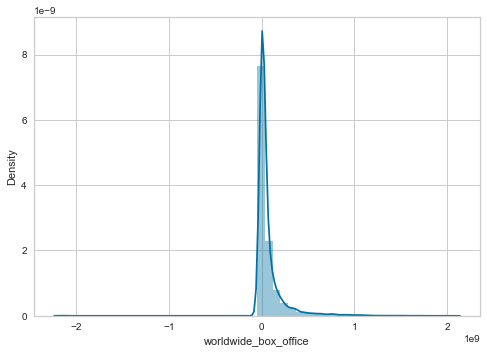

In [1113]:
sns.distplot(df_cleaned["worldwide_box_office"])

In the graph above, you can see that the worldwide box office data is not normally distributed. For this reason, the log function is applied in the following code cell. 

(array([2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 5.123e+03,
        1.830e+02, 5.200e+01, 9.000e+00, 4.000e+00]),
 array([-2.14748365e+09, -1.72789931e+09, -1.30831497e+09, -8.88730627e+08,
        -4.69146287e+08, -4.95619470e+07,  3.70022393e+08,  7.89606733e+08,
         1.20919107e+09,  1.62877541e+09,  2.04835975e+09]),
 <BarContainer object of 10 artists>)

(array([   6.,   15.,   55.,  140.,  462.,  766.,  967., 1282., 1349.,
         329.]),
 array([ 2.48490665,  4.3804465 ,  6.27598636,  8.17152621, 10.06706607,
        11.96260592, 13.85814577, 15.75368563, 17.64922548, 19.54476534,
        21.44030519]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'Original Data')

Text(0.5, 1.0, 'Transformed Data')

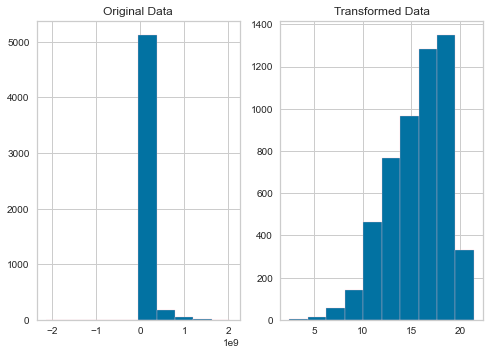

In [1114]:
# Code adjusted from Business statistics project Statology (2022). 
# create log-transformed because the data was not normaliy distributed. 
data_log = np.log(df_cleaned["worldwide_box_office"]) 
data = df_cleaned["worldwide_box_office"]
# define grid of plots
fig, axs = plt.subplots(nrows=1, ncols=2)

#create histograms
axs[0].hist(data, edgecolor='pink')
axs[1].hist(data_log, edgecolor='pink')

#add title to each histogram
axs[0].set_title('Original Data')
axs[1].set_title('Transformed Data')

<AxesSubplot:xlabel='worldwide_box_office', ylabel='Density'>

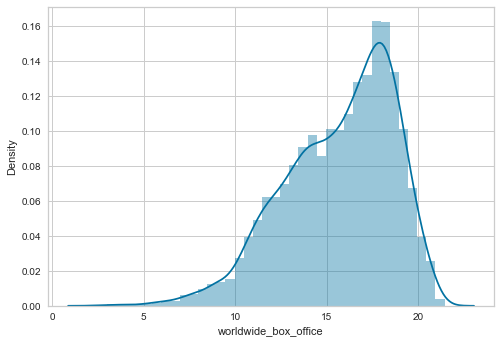

In [1115]:
# Show distplot of worldwide box office after applying the log function. 
sns.distplot(data_log)

In [1116]:
# impute missing values. Code adjusted from Scikit-learn (2022). 
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent',
                        missing_values=np.nan)
imputer = imputer.fit(df_cleaned)
df_cleaned.iloc[:,:] = imputer.transform(df_cleaned)
print()

In [1117]:
# Check if there are no missing values anymore. 
df_cleaned.isnull().sum()

studio                  0
rating                  0
runtime_x               0
genre_x                 0
metascore               0
userscore               0
RelDate                 0
Year                    0
genre_y                 0
worldwide_box_office    0
opening_weekend         0
theatre_count           0
dtype: int64

### III. EDA: Data Testing

In [1118]:
# Code adjusted from Date to Fish (2021)
# Replace ',' with '.'
df_cleaned['userscore']= df_cleaned['userscore'].replace(',','.', regex=True)
df_cleaned['userscore']

4        6.1
8        7.1
11       6.7
15       7.4
18       6.6
        ... 
11988    7.2
11989    4.1
11991    4.4
11993    5.7
11994    8.6
Name: userscore, Length: 5373, dtype: object

In [1119]:
#Test for multicollinearity where 1 = no correlation, between 1-5 = Moderate correlation and 5< = severe correlation
#Code adapted from Shin (2022)

from statsmodels.stats.outliers_influence import variance_inflation_factor
def compute_vif(considered_features):
    x = df_cleaned[considered_features].copy()
    x['intercept'] = 1 # the calculation of variance inflation requires a constant
    vif = pd.DataFrame()
    vif['Feature'] = x.columns
    vif['VIF_Value'] = [variance_inflation_factor(x.values, i) 
    for i in range(len(x.columns))]
    return(vif)

# Run the features in the VIF function and sort them from large to small
considered_features = ['worldwide_box_office', 'opening_weekend', 'theatre_count', 'metascore', 'runtime_x']

compute_vif(considered_features).sort_values('VIF_Value', ascending=False)

,Feature,VIF_Value
5,intercept,40.795580
1,opening_weekend,3.617156
0,worldwide_box_office,2.981613
2,theatre_count,2.205929
3,metascore,1.240213
4,runtime_x,1.082796


In [1120]:
# Code adjusted from Bhaumik (2022a)
# Getting data for each segment of metascore
high_meta = df_cleaned[(df_cleaned['metascore'] > 75)]['worldwide_box_office'].values
reasonable_meta = df_cleaned[((df_cleaned['metascore'] > 50) & (df_cleaned['metascore'] <= 75))]['worldwide_box_office'].values
average_meta = df_cleaned[((df_cleaned['metascore'] < 25) & (df_cleaned['metascore'] <= 50))]['worldwide_box_office'].values
low_meta = df_cleaned[(df_cleaned['metascore'] >= 25)]['worldwide_box_office'].values

# Getting data for each segment of Genre
gendrama = df_cleaned[df_cleaned['genre_y'] == 'Drama']['worldwide_box_office'].values
gendocumentary = df_cleaned[df_cleaned['genre_y'] == 'Documentary']['worldwide_box_office'].values
gencomedy = df_cleaned[df_cleaned['genre_y'] == 'Comedy']['worldwide_box_office'].values
genthriller = df_cleaned[df_cleaned['genre_y'] == 'Thriller/Suspense']['worldwide_box_office'].values
genaction = df_cleaned[df_cleaned['genre_y'] == 'Action']['worldwide_box_office'].values
genhorror = df_cleaned[df_cleaned['genre_y'] == 'Horror']['worldwide_box_office'].values
genadventure = df_cleaned[df_cleaned['genre_y'] == 'Adventure']['worldwide_box_office'].values
genromanticcom = df_cleaned[df_cleaned['genre_y'] == 'Romantic Comedy']['worldwide_box_office'].values
genblackcom = df_cleaned[df_cleaned['genre_y'] == 'Black Comedy']['worldwide_box_office'].values
genmusical = df_cleaned[df_cleaned['genre_y'] == 'Musical']['worldwide_box_office'].values
genwestern = df_cleaned[df_cleaned['genre_y'] == 'Western']['worldwide_box_office'].values
genconcertper = df_cleaned[df_cleaned['genre_y'] == 'Concert/Performance']['worldwide_box_office'].values
genmultiple = df_cleaned[df_cleaned['genre_y'] == 'Multiple Genres']['worldwide_box_office'].values

In [1121]:
# Code adjusted from Bhaumik (2022a)
#Kruskal-Wallis H-test for independent samples, as we need non-parametric tests when normality assumption is not valid
alpha = 0.05
test_stat, p_val = stats.kruskal(high_meta, reasonable_meta, average_meta, low_meta)
print('The p-value for Kruskal-Wallis H test is:', p_val)

if p_val <= alpha:
    print('We reject the null hypothesis that the population median of all of the groups are equal at significance level = {}'.format(alpha))
else:
    print('We fail to reject the null hypothesis that the population median of all of the groups are equal at significance level = {}'.format(alpha))

The p-value for Kruskal-Wallis H test is: 2.077200971051331e-06
We reject the null hypothesis that the population median of all of the groups are equal at significance level = 0.05


### III. Feature Engineering

##### III.I Categorical variable encoding

In [1122]:
#Convert Release date to release month --> Code adjusted from Stack Overflow (2022)
from pandas import DatetimeIndex

month_labels = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August',9: 'September', 10: 'October', 11: 'November', 12: 'December'}

df_cleaned['RelDate'] = pd.DatetimeIndex(df_cleaned['RelDate']).month

x = df_cleaned['RelDate'].apply(lambda x: month_labels[x])

df_cleaned['ReleaseDate'] = x



In [1123]:
# Drop column ReleaseDate
df_cleaned=df_cleaned.drop(columns=['ReleaseDate'])

# Rename RelDate to 'Release_Month'. 
df_cleaned.rename(columns = {'RelDate':'Release_Month'}, inplace = True)

In [1124]:
# Numerical values for columns: Studio & Rating. The code is adjusted from PB Python (2017)

#Defining the objects in our dataframe
dummy_obj_df = df_cleaned.select_dtypes(include=['object']).copy()
dummy_obj_df.head()

#Encoding the Categorical values of studio & rating into numerical values for the model analysis
from sklearn.preprocessing import OrdinalEncoder

#Using the OrdinalEncoder on a dummy_obj_df to make sure the encoding goes right
numerical_enc = OrdinalEncoder()
dummy_obj_df["studio_code"] = numerical_enc.fit_transform(dummy_obj_df[["studio"]])
dummy_obj_df["rating_code"] = numerical_enc.fit_transform(dummy_obj_df[["rating"]])

#using the OrdinalEncoder on the df_cleaned dataframe which is going to be used for model fitting
df_cleaned["studio_code"] = numerical_enc.fit_transform(df_cleaned[["studio"]])
df_cleaned["rating_code"] = numerical_enc.fit_transform(df_cleaned[["rating"]])
df_cleaned[["studio", "studio_code", "rating", 'rating_code']].head(10)


# Drop columns studio and rating 
df_cleaned = df_cleaned.drop(columns=['studio', 'rating'])

,studio,rating,genre_x,userscore,genre_y
4,Samuel Goldwyn Films,| R,Drama,6.1,Drama
8,Kino Lorber,| Not Rated,Drama,7.1,Drama
11,THINKFilm,| R,"Drama,Mystery,Thriller,Crime",6.7,Drama
15,Sony Pictures Classics,| PG-13,"Drama,Thriller,Crime,War",7.4,Thriller/Suspense
18,Sony Pictures Classics,| PG-13,"History,Sport",6.6,Drama


,studio,studio_code,rating,rating_code
4,Samuel Goldwyn Films,420.0,| R,10.0
8,Kino Lorber,260.0,| Not Rated,5.0
11,THINKFilm,461.0,| R,10.0
15,Sony Pictures Classics,439.0,| PG-13,9.0
18,Sony Pictures Classics,439.0,| PG-13,9.0
20,Fox Atomic,201.0,| PG-13,9.0
21,Warner Bros.,512.0,| R,10.0
22,Fox Searchlight Pictures,203.0,| R,10.0
24,Fox Searchlight Pictures,203.0,| R,10.0
25,Anchor Bay Films,35.0,| R,10.0


In [1125]:
df_cleaned.tail()

,runtime_x,genre_x,metascore,userscore,Release_Month,Year,genre_y,worldwide_box_office,opening_weekend,theatre_count,studio_code,rating_code
11988,89.0,Comedy,61,7.2,9,2001.0,Comedy,60780981,15525043.0,2507.0,373.0,10.0
11989,102.0,Comedy,34,4.1,12,2016.0,Comedy,55348693,13841146.0,3394.0,373.0,9.0
11991,83.0,"Action,Adventure,Sci-Fi,Family",26,4.4,11,2006.0,Adventure,12506188,4510408.0,2501.0,115.0,7.0
11993,96.0,"Drama,Comedy,Animation",55,5.7,2,2006.0,Adventure,12506188,4510408.0,2501.0,423.0,5.0
11994,108.0,"Action,Adventure,Comedy,Crime,Animation,Family",78,8.6,4,2016.0,Adventure,1004629935,75063401.0,3827.0,511.0,7.0


In [1126]:
df_cleaned.head()

,runtime_x,genre_x,metascore,userscore,Release_Month,Year,genre_y,worldwide_box_office,opening_weekend,theatre_count,studio_code,rating_code
4,93.0,Drama,44,6.1,1,2016.0,Drama,307,9134.0,4.0,420.0,10.0
8,93.0,Drama,65,7.1,8,2015.0,Drama,47019,9134.0,4.0,260.0,5.0
11,107.0,"Drama,Mystery,Thriller,Crime",36,6.7,8,2006.0,Drama,143782,20774.0,6.0,461.0,10.0
15,159.0,"Drama,Thriller,Crime,War",72,7.4,4,2009.0,Thriller/Suspense,4581361,12042.0,5.0,439.0,9.0
18,118.0,"History,Sport",44,6.6,11,2021.0,Drama,3712409,251569.0,132.0,439.0,9.0


In [1127]:
# Code adjusted from Pinosio (2022)
# Defines main and other genres, goes over the genre_x column and counts the set genres

main_genres = ['Comedy', 'Drama', 'Action','Romance','Adventure','Horror','Thriller'] # Define main genres here

is_main_genre = {}

genres = df_cleaned['genre_x'].str.split(',') #Splits the genres with a comma 

len_genres = []
n_other_genres = []
#is_comedy = []
#is_drama = []

for genre_list in genres:
    try:
      l = len(genre_list)
      len_genres.append(l)
      other_genres = [x for x in genre_list if x not in main_genres] #Defines other genres (those that are not in "main_genre")
      n_other_genres.append(len(other_genres)) 

      for main_genre in main_genres:
        if main_genre in genre_list:
          is_main_genre.setdefault(main_genre, []).append(1) 
        else:
          is_main_genre.setdefault(main_genre, []).append(0)
    except:
        len_genres.append(0)
        n_other_genres.append(0)
        for main_genres in main_genres:
          is_main_genre.setdefault(main_genre, []).append(0)

In [1128]:
# Code adjusted from Pinosio (2022)
# Looks if the genre column containts the genre then creates a boolean array
is_comedy= 'Comedy'in genre_list
is_drama= 'Drama'in genre_list
is_horror= 'Horror' in genre_list
is_romance='Romance' in genre_list
is_action='Action' in genre_list
is_adventure='Adventure' in genre_list
is_thriller='Thriller' in genre_list

# Adds the array to the dataframe but I think it just creates a temporary copy here
df_cleaned['is_comedy'] = is_comedy
df_cleaned['is_drama'] = is_drama
df_cleaned['is_horror'] = is_horror
df_cleaned['is_romance'] = is_romance
df_cleaned['is_action'] = is_action
df_cleaned['is_adventure'] = is_adventure
df_cleaned['is_thriller'] = is_thriller

df_genres = df_cleaned[['genre_x','is_comedy','is_drama','is_horror','is_romance','is_action','is_adventure','is_thriller']]
df_cleaned['is_comedy'].dropna(inplace=True)

NAs = df_cleaned[df_cleaned.isna().any(axis=1)]

# Specify whether a certain movie has "other genres" in the genre column

has_other_genres = []

for genrenum in n_other_genres:
    if genrenum >= 1:
        has_other_genres.append(True)
    else:
        has_other_genres.append(False)

df_cleaned['has_other_genre'] = has_other_genres

df_genres['has_other_genre'] = has_other_genres

# convert from true/false to 1/0 by changing the types
df_cleaned['is_comedy'] = df_cleaned['is_comedy'].astype('int64') 
df_cleaned['is_drama'] = df_cleaned['is_drama'].astype('int64') 
df_cleaned['is_horror'] = df_cleaned['is_horror'].astype('int64') 
df_cleaned['is_romance'] = df_cleaned['is_romance'].astype('int64')
df_cleaned['is_action'] = df_cleaned['is_action'].astype('int64')
df_cleaned['is_adventure'] = df_cleaned['is_adventure'].astype('int64')
df_cleaned['is_thriller'] = df_cleaned['is_thriller'].astype('int64')
df_cleaned['has_other_genre'] = df_cleaned['has_other_genre'].astype('int64')


In [1129]:
# Drop columns genre_ x and genre_y
df_cleaned= df_cleaned.drop(columns=['genre_y', 'genre_x'])

In [1130]:
df_cleaned.head()

,runtime_x,metascore,userscore,Release_Month,Year,worldwide_box_office,opening_weekend,theatre_count,studio_code,rating_code,is_comedy,is_drama,is_horror,is_romance,is_action,is_adventure,is_thriller,has_other_genre
4,93.0,44,6.1,1,2016.0,307,9134.0,4.0,420.0,10.0,1,0,0,0,1,1,0,0
8,93.0,65,7.1,8,2015.0,47019,9134.0,4.0,260.0,5.0,1,0,0,0,1,1,0,0
11,107.0,36,6.7,8,2006.0,143782,20774.0,6.0,461.0,10.0,1,0,0,0,1,1,0,1
15,159.0,72,7.4,4,2009.0,4581361,12042.0,5.0,439.0,9.0,1,0,0,0,1,1,0,1
18,118.0,44,6.6,11,2021.0,3712409,251569.0,132.0,439.0,9.0,1,0,0,0,1,1,0,1


In [1131]:
df_cleaned.dtypes

runtime_x               float64
metascore                 int64
userscore                object
Release_Month             int64
Year                    float64
worldwide_box_office      int64
opening_weekend         float64
theatre_count           float64
studio_code             float64
rating_code             float64
is_comedy                 int64
is_drama                  int64
is_horror                 int64
is_romance                int64
is_action                 int64
is_adventure              int64
is_thriller               int64
has_other_genre           int64
dtype: object

### VII. Random Forest - Victor

### VIII. Peceptron model and Artifical Neutral - Ward

### IX. Clustering model - Melanie & Guido

In [1132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler # https://www.statology.org/k-means-clustering-in-python/

#### IX.I PCA

In [1133]:
# Code adjusted from Date to Fish (2021)
# Replace ',' with '.'
df_cleaned['userscore']= df_cleaned['userscore'].replace(',','.', regex=True)
df_cleaned['userscore']

4        6.1
8        7.1
11       6.7
15       7.4
18       6.6
        ... 
11988    7.2
11989    4.1
11991    4.4
11993    5.7
11994    8.6
Name: userscore, Length: 5373, dtype: object

In [1134]:
# Code adjusted from Bhaumik(2022b)
# feature scaling
from sklearn.preprocessing import StandardScaler
# define standard scaler instance
scaler = StandardScaler()
# Fitting the StandardScaler to df_cleaned
scaler.fit(df_cleaned)
# Scaling df used the fitting Standard scalar
df_scaled = pd.DataFrame(scaler.transform(df_cleaned), columns=df_cleaned.columns)

StandardScaler()

<BarContainer object of 18 artists>

Text(0, 0.5, 'Explained variance ratio')

Text(0.5, 0, 'Principal component index')

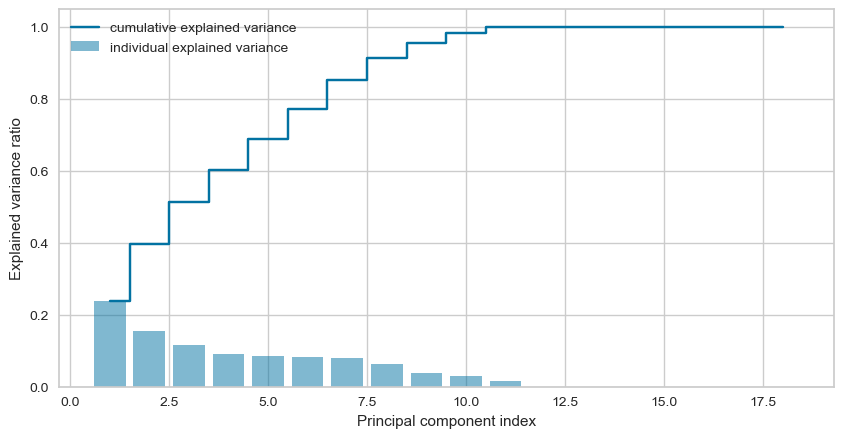

In [1135]:
# Code adjusted from Bhaumik(2022b)
# Performing PCA
from sklearn.decomposition import PCA
pca = PCA()
pca_comps = pca.fit_transform(df_scaled) # pca components
var_exp = pca.explained_variance_ratio_ # variance explained ratio 
cum_var_exp = np.cumsum(var_exp) # cumulative variance

# plot of explained variances
fig = plt.figure(figsize=(10, 5), dpi=100)
plt.bar(range(1,len(var_exp)+1), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,len(var_exp)+1), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()


The plot shows that 5 or 6 features are needed to land on 0.7 of the explained variance ratio, which is more or less a frequently used threshold. 

In [1136]:
# Code adjusted from Bhaumik(2022b)
#We select the variance explained threshold
var_exp_thres = 0.7
#calling pcs instance with desired variance explained threshold
pca = PCA(var_exp_thres)  
pca_comps = pca.fit_transform(df_scaled)  
print('Number of components to explain {:0.0f}% variance is {}'.format(var_exp_thres*100, pca.n_components_))

Number of components to explain 70% variance is 6


#### IX.II Feature selection

In [1138]:
# Code adjusted from Bhaumik(2022b)
# get the index of the most important feature on each component ---> find the 6 components
# we do it using list comprehension
most_important_features_idx = [np.abs(pca.components_[i]).argmax() for i in range(pca.n_components_)]
most_important_features = df_cleaned.columns[most_important_features_idx]

print('The most important features are:', most_important_features.values)

The most important features are: ['opening_weekend' 'metascore' 'rating_code' 'Release_Month'
 'has_other_genre' 'studio_code']


### KMeans on the important Principal Components (PCs)

KElbowVisualizer(ax=<AxesSubplot:>, estimator=KMeans(n_clusters=11), k=(4, 12))

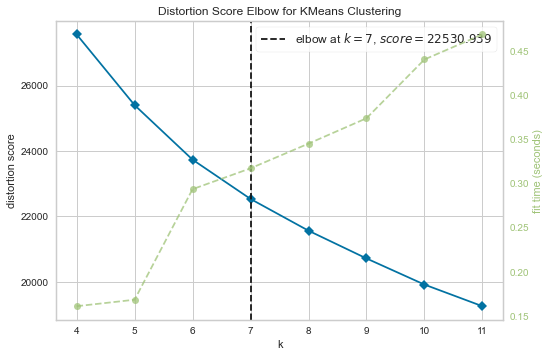

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

The best cluster number is: 7


In [1139]:
# Code adjusted from Bhaumik(2022b)
# performing the elbow method
# Instantiate the clustering model and visualizer
kmeans = KMeans() #
visualizer = KElbowVisualizer(kmeans, k=(4,12)) 
visualizer.fit(pca_comps)        #Fit the important PCA component data to the visualizer
visualizer.show()        # Finalize and render the figure
print('The best cluster number is:', visualizer.elbow_value_) # Get elbow value

In [1140]:
# Code adjusted from Bhaumik(2022b)
kmeans_best_cluster = KMeans(n_clusters=visualizer.elbow_value_)
kmeans_best_cluster.fit(pca_comps)
#saving the cluster labels
Kmeans_clusters_PCs = kmeans_best_cluster.labels_

KMeans(n_clusters=7)

### Kmeans on the important features computed from the PCA components

KElbowVisualizer(ax=<AxesSubplot:>, estimator=KMeans(n_clusters=11), k=(4, 12))

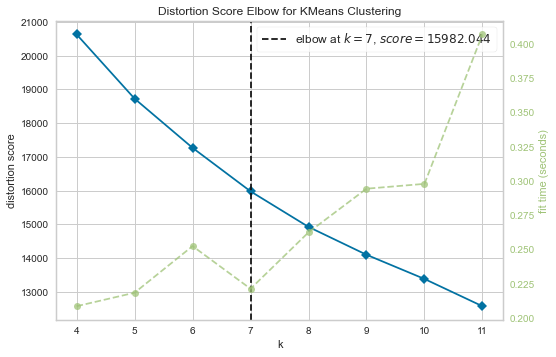

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

7

The best cluster number is: 7


In [1141]:
# Code adjusted from Bhaumik(2022b)
# Instantiate the clustering model and visualizer
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(4,12))
visualizer.fit(df_scaled[most_important_features])        # Fit the important features data to the visualizer
visualizer.show()        # Finalize and render the figure
visualizer.elbow_value_ # Get elbow value

print('The best cluster number is:', visualizer.elbow_value_) # Get elbow value

In [1142]:
# Code adjusted from Bhaumik(2022b)
# Kmeans with 7 clusters
kmeans_best_cluster = KMeans(n_clusters=visualizer.elbow_value_)
kmeans_best_cluster.fit(df_scaled[most_important_features])
#saving the cluster labels
Kmeans_clusters_ImpFeatures = kmeans_best_cluster.labels_


KMeans(n_clusters=7)

#### Model evaluation

In [1143]:
# Code adjusted from Bhaumik(2022b)
from sklearn import metrics
sc = []
dbi = []

#metrics from imporant PC features method
sc.append(metrics.silhouette_score(pca_comps, Kmeans_clusters_PCs, metric='euclidean'))
dbi.append(metrics.davies_bouldin_score(pca_comps, Kmeans_clusters_PCs))

#metrics from imporant features from PCA method
sc.append(metrics.silhouette_score(df_scaled[most_important_features], Kmeans_clusters_ImpFeatures, metric='euclidean'))
dbi.append(metrics.davies_bouldin_score(df_scaled[most_important_features], Kmeans_clusters_ImpFeatures))

clusteting_methods = ['Kmean_on_PCs', 'Kmean_on_ImpFeatures']

# Creating a pandas dataframe
d = {'silhouette_score': sc, 'DBI': dbi, 'clusteting_methods':clusteting_methods}
df_metrics = pd.DataFrame(d)
df_metrics.set_index('clusteting_methods', inplace = True)
df_metrics


,silhouette_score,DBI
clusteting_methods,,
Kmean_on_PCs,0.149645,1.623831
Kmean_on_ImpFeatures,0.191753,1.468044


Based on the results of the silhouette score and DBI, it can be noted that the Kmean on most important features scores the best. 

#### IX.III Clusters

Text(0.5, 0, 'PC1')

Text(0.5, 0.5, 'PC2')

Text(0.5, 0, 'PC3')

Text(0.5, 0.92, 'Clusters computed from important PCs')

Text(0.5, 0, 'opening_weekend')

Text(0.5, 0.5, 'metascore')

Text(0.5, 0, 'rating_code')

Text(0.5, 0.92, 'Clusters computed from important features from PCA')

Text(0.5, 0, 'opening_weekend')

Text(0.5, 0.5, 'metascore')

Text(0.5, 0, 'rating_code')

Text(0.5, 0.92, 'Clusters computed from important features from PCA')

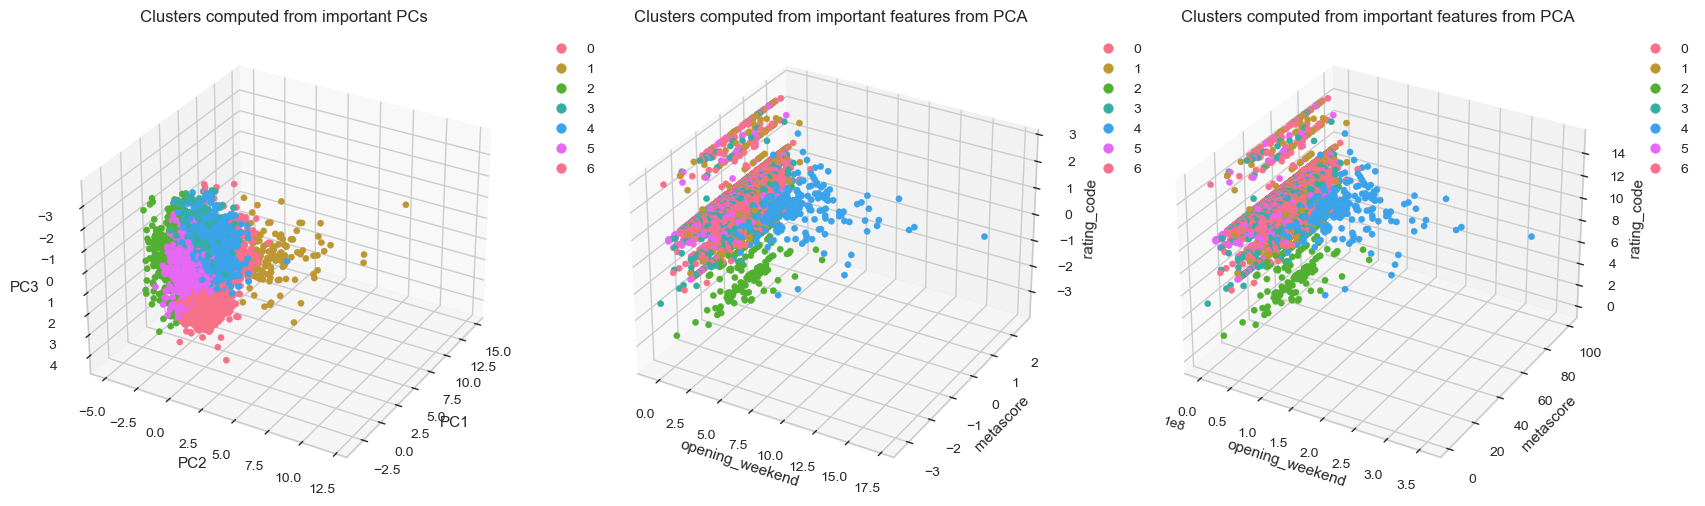

In [1144]:
# Code adjusted from Bhaumik(2022b)
## Let us visualize how the clusters look on the first 3 PCs and 3 important fearures computed from the two methods
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
# get colormap from seaborn
cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())

fig = plt.figure(figsize=(20, 7.5), dpi=100)

# set up the axes for the first plot
ax = fig.add_subplot(1, 3, 1, projection='3d')
sc_ = ax.scatter(pca_comps[:,0],pca_comps[:,1],pca_comps[:,2], c=Kmeans_clusters_PCs, marker='o', cmap=cmap, alpha=1)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('Clusters computed from important PCs')
ax.legend(*sc_.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)
ax.view_init(-150, -30)


# set up the axes for the second plot
ax = fig.add_subplot(1, 3, 2, projection='3d')
sc_ = ax.scatter(df_scaled[most_important_features[0]],df_scaled[most_important_features[1]],df_scaled[most_important_features[2]], 
                        c = Kmeans_clusters_ImpFeatures, marker='o', cmap=cmap, alpha=1)
ax.set_xlabel(most_important_features[0])
ax.set_ylabel(most_important_features[1])
ax.set_zlabel(most_important_features[2])
ax.set_title('Clusters computed from important features from PCA')
ax.legend(*sc_.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

# set up the axes for the 3rd plot
ax = fig.add_subplot(1, 3, 3, projection='3d')
sc_ = ax.scatter(df_cleaned[most_important_features[0]],df_cleaned[most_important_features[1]],df_cleaned[most_important_features[2]], 
                        c = Kmeans_clusters_ImpFeatures, marker='o', cmap=cmap, alpha=1)
ax.set_xlabel(most_important_features[0])
ax.set_ylabel(most_important_features[1])
ax.set_zlabel(most_important_features[2])
ax.set_title('Clusters computed from important features from PCA')
ax.legend(*sc_.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

With the graph above, it is difficult to read exactly what the clusters computed from the important PCs look like. With the second and third graphs (clusters based on the important features), this is a little better to see but still not optimal. 

#### IX.IV DBSCAN 

In [1145]:
# Code adjusted from Bhaumik (2022b)
# Add code here for DBSCAN
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors 

In [1146]:
pca_comps.shape[1]

6

In [1147]:
# Code adjusted from Bhaumik(2022b)
# min_samples >= P+1, with P the number of features
min_samples = (pca_comps.shape[1] + 1)

#DBSCAN model building 
dbscan = DBSCAN(eps = 1.5, min_samples = min_samples)
db_clusters = dbscan.fit_predict(pca_comps)

print('dbscan creates clusters:', list(set(db_clusters)))

dbscan creates clusters: [0, -1]


The DBSCAN was able to create 1 cluster [0]. [-1] represents "noise" and thus known to be an outlier. 

Text(0.5, 0, 'index')

Text(0, 0.5, 'distance')

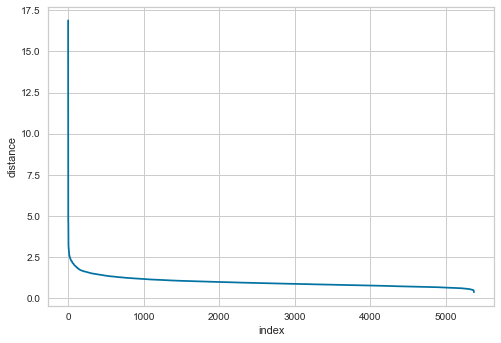

In [1148]:
# Code adjusted from Bhaumik(2022b)
# find the value of epsilon 
k = min_samples
knn_fit = NearestNeighbors(n_neighbors=k).fit(pca_comps)
distances, indices = knn_fit.kneighbors(pca_comps) # distances are the distance of each point from k nearest neighbors, sorted in ascending order
further_neighbor = distances[:,-1] = distances[:,-1]
further_neighbor[::-1].sort() #sorting the distance in descending order

#ploting the elbow method plot
plt.plot(further_neighbor)
plt.xlabel('index')
plt.ylabel('distance')
plt.grid(visible=True, which='both')
plt.show()

One possible explanation for the straight vertical line is that there is an outlier far away from the data points. When looking at the clusters' graphs, it can be noticed that there is an outlier. In the first graph, the outlier is marked by a green dot and graphs 2 and 3 as a blue dot.

In addition, the chart above indicates that the value of epsilon should be +/- 1.5.

In [1149]:
# Code adjusted from Bhaumik(2022b)
#DBSCAN final model building 
dbscan = DBSCAN(eps = 1.5, min_samples = 4)
db_clusters_PCs = dbscan.fit_predict(pca_comps)
print('dbscan has created clusters:', list(set(db_clusters_PCs)))

dbscan has created clusters: [0, 1, 2, -1]


The DBSCAN was able to create 3 clusters [0,1,2].

##### 4b) DBSCAN on the important features computed from the PCA components 

Text(0.5, 0, 'index')

Text(0, 0.5, 'distance')

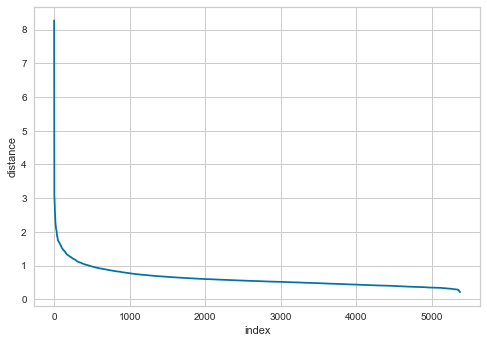

In [1150]:
# Code adjusted from Bhaumik (2022b)
k = min_samples
knn_fit = NearestNeighbors(n_neighbors=k).fit(df_scaled[most_important_features])
distances, indices = knn_fit.kneighbors(df_scaled[most_important_features]) # distances are the distance of each point from k nearest neighbors, sorted in ascending order
further_neighbor = distances[:,-1] = distances[:,-1]
further_neighbor[::-1].sort() #sorting the distance in descending order

#ploting the elbow method plot
plt.plot(further_neighbor)
plt.xlabel('index')
plt.ylabel('distance')
plt.grid(visible=True, which='both')
plt.show()

From the graph it can be seen that the value of epsilon is 1.5

In [1151]:
# Code adjusted from Bhaumik (2022b)
#DBSCAN final model building 
dbscan = DBSCAN(eps = 1.5, min_samples = min_samples)
db_clusters_ImpFeatures = dbscan.fit_predict(df_scaled[most_important_features])
print('dbscan has created clusters:', list(set(db_clusters_ImpFeatures)))

dbscan has created clusters: [0, 1, -1]


By this method the DBSCAN was able to create 2 clusters [0,1].

In [1152]:
#print(len(sc), len(dbi), len(clusteting_methods))

#### Model evaluation

In [1153]:
# Code adjusted from Bhaumik (2022b)
#metrics from imporant PC features method
sc.append(metrics.silhouette_score(pca_comps, db_clusters_PCs, metric='euclidean'))
dbi.append(metrics.davies_bouldin_score(pca_comps, db_clusters_PCs))
clusteting_methods.append('DBSCAN_on_PCs')

#metrics from imporant features from PCA method
sc.append(metrics.silhouette_score(df_scaled[most_important_features], db_clusters_ImpFeatures, metric='euclidean'))
dbi.append(metrics.davies_bouldin_score(df_scaled[most_important_features], db_clusters_ImpFeatures))
clusteting_methods.append('DBSCAN_on_ImpFeatures')

# Creating a pandas dataframe
d = {'silhouette_score': sc, 'DBI': dbi, 'clusteting_methods':clusteting_methods}
df_metrics = pd.DataFrame(d)
df_metrics.set_index('clusteting_methods', inplace = True)
df_metrics


,silhouette_score,DBI
clusteting_methods,,
Kmean_on_PCs,0.149645,1.623831
Kmean_on_ImpFeatures,0.191753,1.468044
DBSCAN_on_PCs,0.385889,1.794722
DBSCAN_on_ImpFeatures,0.198973,1.702749


Based on the results of the silhouette score and DBI, it can be noted that the DBSCAN on PC's scores better compared to the Kmean on important features. 

#### IX.V H-DBSCAN 

<AxesSubplot:ylabel='$\\lambda$ value'>

array([-1,  0,  1,  2,  3], dtype=int64)

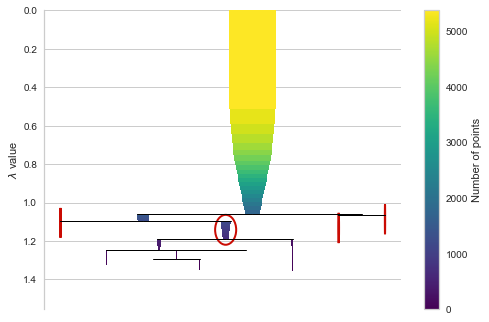

In [1154]:
# Code adjusted from Bhaumik (2022b)
# %conda install -c conda-forge hdbscan
import hdbscan # for installation use: conda install -c conda-forge hdbscan
hdbscan = hdbscan.HDBSCAN(min_cluster_size = k, min_samples = 15) # k is the min_samples from DBSCAN
hdb_clusters_PCs = hdbscan.fit_predict(pca_comps)
hdbscan.condensed_tree_.plot(select_clusters=True)
np.unique(hdb_clusters_PCs)

<AxesSubplot:ylabel='$\\lambda$ value'>

array([-1,  0,  1], dtype=int64)

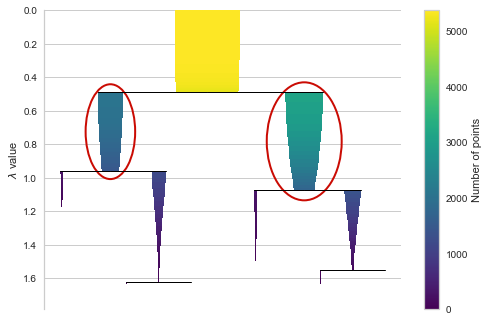

In [1155]:
# Code adjusted from Bhaumik (2022b)
import hdbscan 
hdbscan = hdbscan.HDBSCAN(min_cluster_size = k, min_samples = 40) # k is the min_samples from DBSCAN
hdb_clusters_ImpFeatures = hdbscan.fit_predict(df_scaled[most_important_features])
hdbscan.condensed_tree_.plot(select_clusters=True)
np.unique(hdb_clusters_ImpFeatures)

#### Model evaluation

In [1156]:
# Code adjusted from Bhaumik (2022b)
#metrics from imporant PC features method
sc.append(metrics.silhouette_score(pca_comps, hdb_clusters_PCs, metric='euclidean'))
dbi.append(metrics.davies_bouldin_score(pca_comps, hdb_clusters_PCs))
clusteting_methods.append('HDBSCAN_on_PCs')

#metrics from imporant features from PCA method
sc.append(metrics.silhouette_score(df_scaled[most_important_features], hdb_clusters_ImpFeatures, metric='euclidean'))
dbi.append(metrics.davies_bouldin_score(df_scaled[most_important_features], hdb_clusters_ImpFeatures))
clusteting_methods.append('HDBSCAN_on_ImpFeatures')

# Creating a pandas dataframe
d = {'silhouette_score': sc, 'DBI': dbi, 'clusteting_methods':clusteting_methods}
df_metrics = pd.DataFrame(d)
df_metrics.set_index('clusteting_methods', inplace = True)
df_metrics

,silhouette_score,DBI
clusteting_methods,,
Kmean_on_PCs,0.149645,1.623831
Kmean_on_ImpFeatures,0.191753,1.468044
DBSCAN_on_PCs,0.385889,1.794722
DBSCAN_on_ImpFeatures,0.198973,1.702749
HDBSCAN_on_PCs,-0.200857,2.517055
HDBSCAN_on_ImpFeatures,0.196939,2.262287


Based on the results of the silhouette score and DBI, we can conclude that DBSCAN on Principal Components scores the best. Because the lower the average similarity is, the better the clusters are separated and the better is the result of the clustering performed.

(array([1037.,  161.,    0.,  832.,    0.,  806.,  896.,    0.,  924.,
         717.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <BarContainer object of 10 artists>)

Text(0.7, 0.8, 'Kmeans clusters on PCs')

Text(0, 0.5, 'Cluster size')

(array([916., 734.,   0., 956.,   0., 825., 203.,   0., 806., 933.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <BarContainer object of 10 artists>)

Text(0.7, 0.8, 'Kmeans clusters on ImpFeatures')

Text(0, 0.5, 'Cluster size')

(array([9.600e+01, 0.000e+00, 0.000e+00, 5.266e+03, 0.000e+00, 0.000e+00,
        8.000e+00, 0.000e+00, 0.000e+00, 3.000e+00]),
 array([-1. , -0.7, -0.4, -0.1,  0.2,  0.5,  0.8,  1.1,  1.4,  1.7,  2. ]),
 <BarContainer object of 10 artists>)

Text(0.7, 0.8, 'DBSCAN clusters on PCs')

Text(0, 0.5, 'Cluster size')

(array([  56.,    0.,    0.,    0.,    0., 2099.,    0.,    0.,    0.,
        3218.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <BarContainer object of 10 artists>)

Text(0.3, 0.8, 'DBSCAN clusters on ImpFeatures')

Text(0, 0.5, 'Cluster size')

(array([4071.,    0.,   47.,    0.,    0.,   18.,    0.,   16.,    0.,
        1221.]),
 array([-1. , -0.6, -0.2,  0.2,  0.6,  1. ,  1.4,  1.8,  2.2,  2.6,  3. ]),
 <BarContainer object of 10 artists>)

Text(0.6, 0.8, 'HDBSCAN clusters on PCs')

Text(0, 0.5, 'Cluster size')

(array([ 197.,    0.,    0.,    0.,    0., 2060.,    0.,    0.,    0.,
        3116.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <BarContainer object of 10 artists>)

Text(0.6, 0.8, 'HDBSCAN clusters on ImpFeatures')

Text(0, 0.5, 'Cluster size')

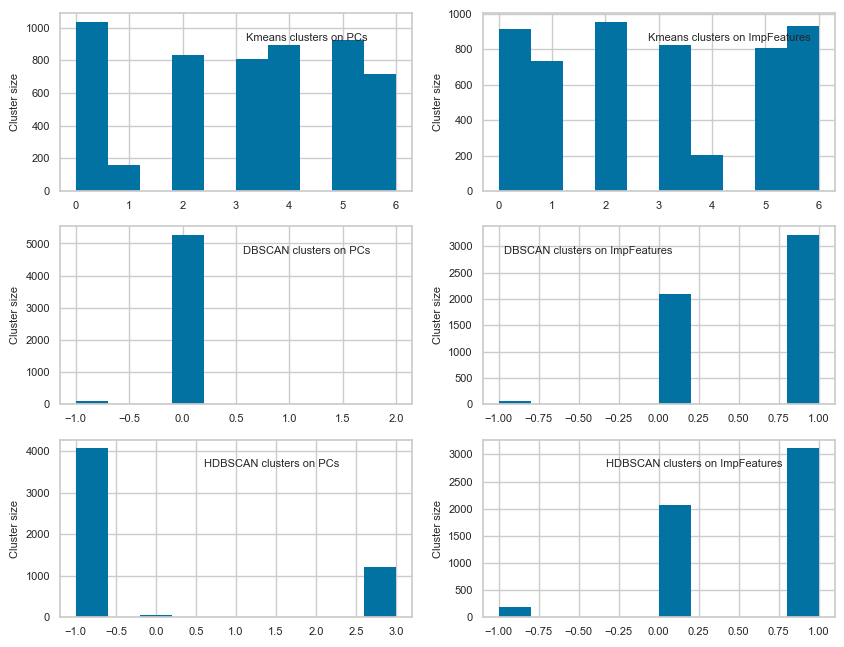

In [1157]:
# Code adjusted from Bhaumik (2022b)
import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(3,2)
fig = plt.figure(figsize=(10, 8), dpi=100)
ax1=fig.add_subplot(gs[0,0])
ax2=fig.add_subplot(gs[0,1])
ax3=fig.add_subplot(gs[1,0])
ax4=fig.add_subplot(gs[1,1])
ax5=fig.add_subplot(gs[2,0])
ax6=fig.add_subplot(gs[2,1])

ax1.hist(Kmeans_clusters_PCs)
ax1.set_title('Kmeans clusters on PCs', fontsize = 8, x=0.7, y=0.8)
ax1.set_ylabel('Cluster size', fontsize = 8)
ax1.tick_params(axis='both', which='major', labelsize=8)

ax2.hist(Kmeans_clusters_ImpFeatures)
ax2.set_title('Kmeans clusters on ImpFeatures', fontsize = 8, x=0.7, y=0.8)
ax2.set_ylabel('Cluster size', fontsize = 8)
ax2.tick_params(axis='both', which='major', labelsize=8)

ax3.hist(db_clusters_PCs)
ax3.set_title('DBSCAN clusters on PCs', fontsize = 8, x=0.7, y=0.8)
ax3.set_ylabel('Cluster size', fontsize = 8)
ax3.tick_params(axis='both', which='major', labelsize=8)

ax4.hist(db_clusters_ImpFeatures)
ax4.set_title('DBSCAN clusters on ImpFeatures', fontsize = 8, x=0.3, y=0.8)
ax4.set_ylabel('Cluster size', fontsize = 8)
ax4.tick_params(axis='both', which='major', labelsize=8)

ax5.hist(hdb_clusters_PCs)
ax5.set_title('HDBSCAN clusters on PCs', fontsize = 8, x=0.6, y=0.8)
ax5.set_ylabel('Cluster size', fontsize = 8)
ax5.tick_params(axis='both', which='major', labelsize=8)

ax6.hist(hdb_clusters_ImpFeatures)
ax6.set_title('HDBSCAN clusters on ImpFeatures', fontsize = 8, x=0.6, y=0.8)
ax6.set_ylabel('Cluster size', fontsize = 8)
ax6.tick_params(axis='both', which='major', labelsize=8)

plt.show()

Looking at the graph above, it can be concluded that the DBSCAN on PC's shows only one clear cluster. Because of this, we choose to go for the DBSCAN on important features, which has one more cluster and also scores not bad on the silhouette and DBI score.  

### Summary

In [1158]:
# Code adjusted from Bhaumik (2022)
# DB_ clusters on the best performing model.
#adding the cluster column to the original dataset
df_cleaned['cluster'] = db_clusters_ImpFeatures
df_cleaned.head()

,runtime_x,metascore,userscore,Release_Month,Year,worldwide_box_office,opening_weekend,theatre_count,studio_code,rating_code,is_comedy,is_drama,is_horror,is_romance,is_action,is_adventure,is_thriller,has_other_genre,cluster
4,93.0,44,6.1,1,2016.0,307,9134.0,4.0,420.0,10.0,1,0,0,0,1,1,0,0,0
8,93.0,65,7.1,8,2015.0,47019,9134.0,4.0,260.0,5.0,1,0,0,0,1,1,0,0,0
11,107.0,36,6.7,8,2006.0,143782,20774.0,6.0,461.0,10.0,1,0,0,0,1,1,0,1,1
15,159.0,72,7.4,4,2009.0,4581361,12042.0,5.0,439.0,9.0,1,0,0,0,1,1,0,1,1
18,118.0,44,6.6,11,2021.0,3712409,251569.0,132.0,439.0,9.0,1,0,0,0,1,1,0,1,1


Plots for clusters 

<AxesSubplot:xlabel='cluster', ylabel='Count'>

Text(-1.0, 66, '1.0%')

Text(0.0, 2109, '39.1%')

Text(1.0, 3228, '59.9%')

4          January
8           August
11          August
15           April
18        November
           ...    
11988    September
11989     December
11991     November
11993     February
11994        April
Name: RelDate, Length: 5373, dtype: object

<AxesSubplot:xlabel='cluster', ylabel='runtime_x'>

Text(0, 0.5, 'Runtime in minutes)')

(0.0, 250.0)

<AxesSubplot:xlabel='cluster', ylabel='metascore'>

Text(0, 0.5, 'Metascore')

<AxesSubplot:xlabel='cluster', ylabel='theatre_count'>

Text(0, 0.5, 'Theatre_count')

<AxesSubplot:xlabel='cluster', ylabel='rating_code'>

Text(0, 0.5, 'Rating code')

<AxesSubplot:xlabel='cluster', ylabel='opening_weekend'>

Text(0, 0.5, 'opening weekend')

<AxesSubplot:xlabel='cluster', ylabel='worldwide_box_office'>

Text(0, 0.5, 'worldwide_box_office')

<AxesSubplot:xlabel='cluster', ylabel='Count'>

Text(0.09999999999999998, 10.053571428571429, '0.0%')

Text(1.1, 10.070509766555503, '0.0%')

Text(2.1, 10.070229956494718, '0.0%')

Text(0.16666666666666663, 10.089285714285714, '0.0%')

Text(1.1666666666666665, 10.068127679847546, '0.0%')

Text(2.1666666666666665, 10.062150403977626, '0.0%')

Text(0.23333333333333328, 10.053571428571429, '0.0%')

Text(1.2333333333333334, 10.083373034778466, '0.0%')

Text(2.2333333333333334, 10.087321317588565, '0.0%')

Text(0.3, 10.071428571428571, '0.0%')

Text(1.2999999999999998, 10.07717960933778, '0.0%')

Text(2.3, 10.079863269111248, '0.0%')

Text(0.36666666666666664, 10.107142857142858, '0.0%')

Text(1.3666666666666667, 10.082896617436875, '0.0%')

Text(2.3666666666666663, 10.068365444375388, '0.0%')

Text(0.4333333333333333, 10.196428571428571, '0.0%')

Text(1.4333333333333331, 10.083373034778466, '0.0%')

Text(2.433333333333333, 10.0863890615289, '0.0%')

Text(0.5, 10.071428571428571, '0.0%')

Text(1.5, 10.079085278704145, '0.0%')

Text(2.5, 10.089496581727781, '0.0%')

Text(0.5666666666666667, 10.035714285714286, '0.0%')

Text(1.5666666666666669, 10.094330633635064, '0.0%')

Text(2.566666666666667, 10.080484773151026, '0.0%')

Text(0.6333333333333333, 10.053571428571429, '0.0%')

Text(1.6333333333333333, 10.093377798951883, '0.0%')

Text(2.6333333333333333, 10.094779366065879, '0.0%')

Text(0.7, 10.035714285714286, '0.0%')

Text(1.7000000000000002, 10.0924249642687, '0.0%')

Text(2.7, 10.096954630205097, '0.0%')

Text(0.7666666666666666, 10.107142857142858, '0.0%')

Text(1.7666666666666666, 10.086231538828013, '0.0%')

Text(2.7666666666666666, 10.086699813548789, '0.0%')

Text(0.8333333333333334, 10.125, '0.0%')

Text(1.8333333333333335, 10.089090042877562, '0.0%')

Text(2.8333333333333335, 10.097265382224984, '0.0%')

Text(0, 0.5, 'Density Release month')

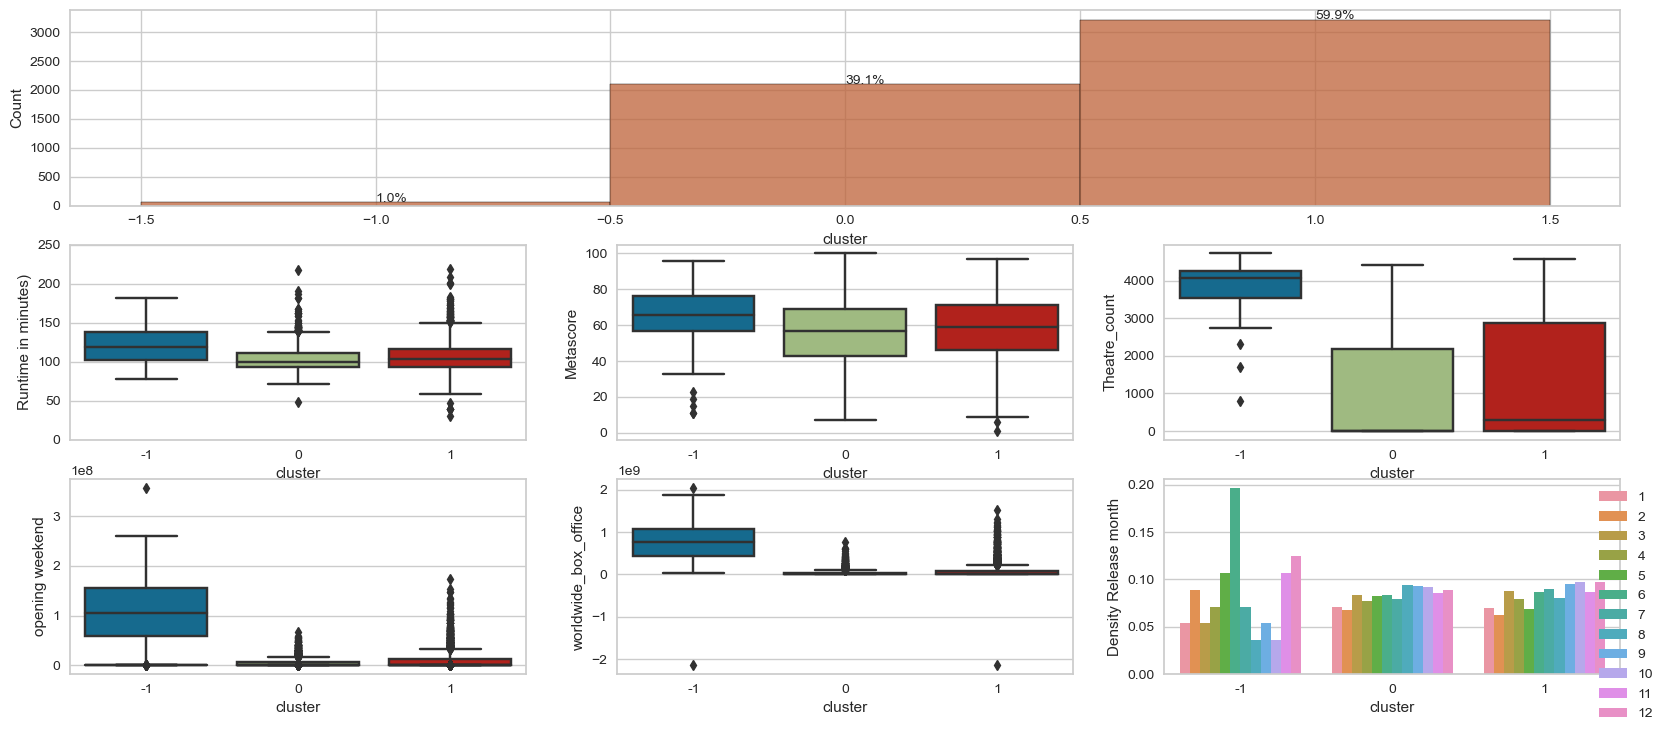

In [1206]:
# Code adjusted from Bhaumik (2022b)
import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(5,3)
fig = plt.figure(figsize=(20, 15), dpi=100)
ax1=fig.add_subplot(gs[0,:])
ax2=fig.add_subplot(gs[1,0])
ax3=fig.add_subplot(gs[1,1])
ax4=fig.add_subplot(gs[1,2])
ax5=fig.add_subplot(gs[2,0])
ax6=fig.add_subplot(gs[2,1])
ax7=fig.add_subplot(gs[2,2])
ax8=fig.add_subplot(gs[3,0])

# Cluster size
sns.histplot(data = df_cleaned, x = "cluster", discrete = True, color = '#be6238', ax = ax1)
for p in ax1.patches:
    ax1.annotate('{:.1f}%'.format((p.get_height()/len(df_cleaned))*100), (p.get_x() + 0.5, p.get_height() + 10), fontsize=10)
x

# Runtime per cluster 
sns.boxplot(data=df_cleaned, y='runtime_x', x='cluster', ax= ax2)
ax2.set_ylabel('Runtime in minutes)')
ax2.set_ylim(0,250)

#Metascore per cluster
sns.boxplot(data=df_cleaned, y='metascore', x='cluster', ax = ax3)
ax3.set_ylabel('Metascore')

# Theatre count per cluster
sns.boxplot(data=df_cleaned, y='theatre_count', x='cluster', ax = ax4)
ax4.set_ylabel('Theatre_count')

# Rating code per cluster
sns.boxplot(data=df_cleaned, y='rating_code', x='cluster', ax = ax5)
ax5.set_ylabel('Rating code')

# Opening weekend per cluster
sns.boxplot(data=df_cleaned, y='opening_weekend', x='cluster', ax = ax5)
ax5.set_ylabel('opening weekend')

# worldwide box office per cluster
sns.boxplot(data=df_cleaned, y='worldwide_box_office', x='cluster', ax = ax6)
ax6.set_ylabel('worldwide_box_office')

# Release month per cluster
counted = df_cleaned.groupby('cluster').Release_Month.value_counts(normalize=True).reset_index(name="Count")
sns.barplot(data=counted, x='cluster', y='Count', hue='Release_Month', ax = ax7)
ax7.legend(loc=1, bbox_to_anchor=(1.1,1), fontsize=10)
for p in ax7.patches:
    ax7.annotate('{:.1f}%'.format((p.get_height()/len(df_cleaned))*100), (p.get_x() + 0.5, p.get_height() + 10), fontsize=20)
ax7.set_ylabel('Density Release month')

# Userscore per cluster
sns.boxplot(data=df_cleaned, y='userscore', x='cluster', ax = ax8)
ax8.set_ylabel('Userscore')

(1.9, 2.1)

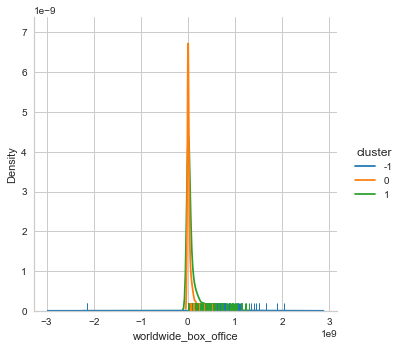

In [1201]:
sns.displot(data=df_cleaned, x='worldwide_box_office', hue='cluster', kind='kde', palette='tab10', rug=True)

##### IX.VI Describe findings

From the graphs above, it can be concluded that of the three clusters, one is very small and sensitive to outliers because the count is significantly lower. In addition, it does stand out that the first cluster includes the highest data points compared to cluster two and three. For example, it can be seen that for the theatre count, the median (4000) is higher than for the other clusters. 

### X. Results sub-questions

- What feature(s) need further research in order to understand their effect on worldwide box office?

Based on the heatmap, it could be seen that the production budget is highly correlated with the worldwide box office. However, the feature could not be further investigated in this research because a lack of datapoints was too severe for the data to be imputed. Due to a lack of datapoints, we had to drop it. In addition to the feature 'production budget,' it is recommended that further research be done on the written reviews. We are trying to determine what we can do to steer worldwide box office, while reviews are written by individuals and can therefore not be steered by us.

- Which features are the most important determinants of customer clusters?

The research found that the most important determinants of customer clusters are: "opening_weekend" "metascore" "rating_code" "release_Month
"has_other_genre" and "studio_code." These are calculated using the principal component index. 

- Which model is the most most accurate in determining the worldwide Box office sales?

In order to determine the right model for predicting the worldwide box office sales for cinema's we established 3 models (Random Forest, kNN, Neural Network). In order to see which model is most accurate we calculated the mean aboslute error for the three models. The models all had their own small EDA and feature selection. This means not all 3 models used the same features and weights. Certain modifications could alter the results of the models in a positive or negative way.

Neural Network mean absolute error: 1.41
Random Forest mean absolute error: 2.4
kNN mean absolute error: 2.3

When comparing these 3 models the Neural Network has a slightly lower mean absolute error. Based on this aspect the Neural Network is the most accurate in determining the worldwide box office sales.

Mean Squared Error of the models has roughly the same variance as the mean absolute error and could also be used to determine the current best model.

Further research needs to be done with live data and better worked out features in order to determine the best model for the cinema's. A more filled out dataframe could change they accuracy and way the models are build.

The Neural Network(For now) should eventually be accurate, robust and fast enough to find out which movies the cinema's should screen.

- To what extent can the Supervised model(s) predict Worldwide box office of a movie based solely on qualitative properties of the movie?

In order to avoid multicollinearity induced from data that is directly collerated with prominence/success of a movie at different movie theatres we chose to drop these features i.e. (average run per theatre, opening weekend, theatre count). Instead when fitting the supervised machine learning models we focused on qualitative features of the movies.

The aim was to see if a model like this is able to at least somewhat accurately predict a movie box office before it airs in theatres based solely on it's genres, runtime and scores of critics and users.

After fitting the Random forest and kNN model with the former mentioned features we have come to the conclusion that neither of the models were able to produce satisfactory results in predicting the box office. Hence a model that would benefit from additional features; which become available well after a movie has been introduced would be significantly more accurate in predicting it's box office.

### XI. Conclusion

The Machine learning project was set up to determine features and create a model for cinema's to let them know which movies they should screen for the most amount of profit.Research was done on this topic which lead to the clustering model and EDA.
When Looking at the performed clustering model important clusters can be determined these clusters are "opening_weekend" "metascore" "rating_code" "release_Month, "has_other_genre" and "studio_code." These are calculated using the principal component index. Some of these features correlate with the already found features of the Heatmap. But other features were claimed as also being important for the models.
After determining the most important features. The kNN, Random Forest and Neural network model were build to create a model which predicted the worldwide box office sales. Based on the statistic mean absolute error of 1.41, Neural Network was deemed the most fit model for predicting the worldwide box office of movies.
After improving the models. The cinemas will be able to determine the worldwide box office of movies and therefore be able to chose the best movies to screen for the most profit.

XII. Reflection Melanie

- I (Melanie) personally find that I have made great progress in my development during the project. Coding I have found quite difficult from the beginning, so I have spent much time watching videos. During the project, I often ran into problems (errors) and was not always able to solve them myself. Because of this, I regularly came to my project members with questions. I asked these questions mainly to Guido because we had to work together on the clustering part of the assignment. I experienced the cooperation between our project group as very pleasant because everyone was willing to help each other. Next time, I would like to practice coding more to work more independently on the assignments. 
-	Guido: As I mentioned earlier, I worked with Guido on the clustering part of the assignment. Guido is a hard worker, communicatively strong and a pleasure to work with. He is always very positive, which creates a relaxed atmosphere within the group. I can easily become stressed when I run into problems. At that moment, Guido is the one who can bring back the peace so that you can work on the assignment with renewed focus.
-	Ward: Ward worked on the neural network part during the project of the subject: 'AI Methods for Business'. He is a smart guy and can get a lot done in a short period of time. This is because Ward is goal-oriented. He also has a strong problem-solving ability because he often knows how to solve his problems himself and does not often have to ask questions to others.
-	Victor: Victor worked on the topics of random forests and KNN during the project. His affinity for coding was strongly shown during the project. He is driven, can look at things from a critical perspective and always has the urge to solve problems. He does this by actively asking questions. In addition, Victor is always open to helping others.
-	In short, I enjoyed working with Guido, Ward and Victor. The communication between us was very good, and everyone was willing to help each other.


X111. Reflection Guido
I can honestly say that this was the hardest project for me so far. It cost me a lot of extra time working on everything, but it did bring me a lot of new knowledge. It was a shame I had a surgery halfway the course or I would have been on the level that I had my eyes on already. It was a great course for me to really try and develop the math basis that sometimes really lacks. The team itself worked really well as we got to know each other in the first course already. However, It would have been better to use something like the trello board again as sometimes I felt structure and timeliness was lacking in the delivering of materials.

- Melanie: During the project I worked mostly with her, because we did the clustering models together. It is always great to be able to brainstorm with her and she always works very hard. Great cooperations, very flexible and sets everything aside to get to her goals.
- Ward: Great silent force in the team. Often took his time and withdrew so that he could focus on the task at hand. Eventually this landed us a great neural network model. Helpful and genuine groupmate, and always does the work he needs to do.
- Victor: The random forest ranger of the group. A hard worker that is very fond of coding and it shows. Keeps finding solutions to the problems we run into and is a joy to work with. Victor is the crictical eye that I sometimes need to further improve on my work and helps me immensely by providing constructive feedback. 

In all this is a great group to work i, because the work ethic and knowledge help me to improve on my weak points. Great work done by everyone.

### Bibliography 

Bhaumik, D. (2022a). Analysis of Variance. Retrieved from https://dlo.mijnhva.nl/d2l/le/content/450552/Home

Bhaumik, D. (2022b). Clustering-with-Kmeans-DBSCAN-HDBSCAN. Retrieved from https://dlo.mijnhva.nl/d2l/le/content/450548/Home

DataSciencePartners. (2022, November 8). Data Cleaning in Python: 4 stappen met voorbeelden in Pandas. Data Science Partners | Experts in Python. Retrieved from https://pythoncursus.nl/data-cleaning-python/

Data to Fish. (2021, July). Replace Characters in Strings in Pandas DataFrame. Retrieved from https://datatofish.com/replace-character-pandas-dataframe/

Medium. (2022, November 22). Exploratory Data Analysis in Python — A Step-by-Step Process. Medium. Retrieved from https://towardsdatascience.com/exploratory-data-analysis-in-python-a-step-by-step-process-d0dfa6bf94ee

PB Python. (2017, February). Guide to Encoding Categorical Values in Python. Retrieved from: https://pbpython.com/categorical-encoding.html

Scikit-learn. (2022). 6.4. Imputation of missing values. Retrieved from https://scikit-learn.org/stable/modules/impute.html

Statology. (2021, September 28). How to Transform Data in Python (Log, Square Root, Cube Root). Retrieved from https://www.statology.org/transform-data-in-python/

Stack Overflow. (2022, August 17). How to call the month from dataframe’s date if the date format is DD/MM/YYYY. Retrieved from https://stackoverflow.com/questions/73382504/how-to-call-the-month-from-dataframes-date-if-the-date-format-is-dd-mm-yyyy

Shin, T. (2022, January 6). Understanding Multicollinearity and How to Detect it in Python. Medium. Retrieved from https://towardsdatascience.com/everything-you-need-to-know-about-multicollinearity-2f21f082d6dc